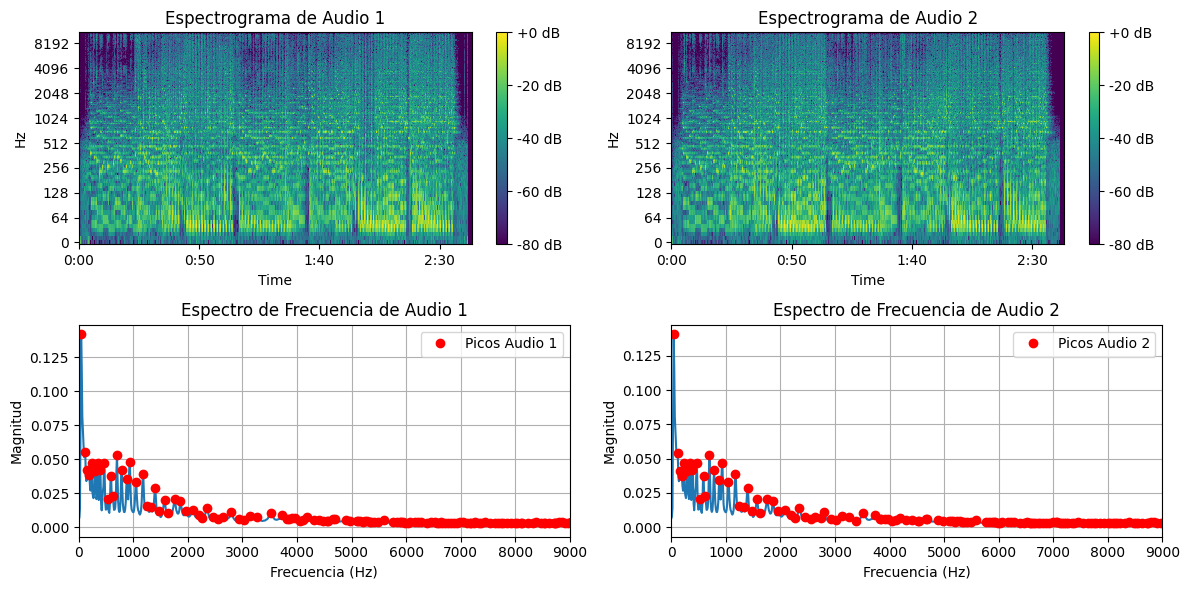

Similitud Espectral: -234.40%
Similitud Temporal: -1100.78%


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from collections import Counter

# Función para calcular el porcentaje de similitud entre dos señales de audio
def calcular_similitud_audio(audio1, audio2):
    signal1, sr1 = librosa.load(audio1)
    signal2, sr2 = librosa.load(audio2)

    min_len = min(len(signal1), len(signal2))
    signal1 = signal1[:min_len]
    signal2 = signal2[:min_len]

    fft_signal1 = np.abs(librosa.stft(signal1, n_fft=2048))
    fft_signal2 = np.abs(librosa.stft(signal2, n_fft=2048))

    fft_signal1 /= np.max(fft_signal1)
    fft_signal2 /= np.max(fft_signal2)

    distancia_espectral = np.linalg.norm(fft_signal1 - fft_signal2)
    porcentaje_similitud_espectral = 100 - (distancia_espectral * 100)

    onset_env1 = librosa.onset.onset_strength(y=signal1, sr=sr1)
    onset_env2 = librosa.onset.onset_strength(y=signal2, sr=sr2)

    distancia_temporal = np.linalg.norm(onset_env1 - onset_env2)
    porcentaje_similitud_temporal = 100 - (distancia_temporal * 100)

     # Calcular los picos en el espectro de frecuencia
    magnitude1 = np.abs(fft_signal1).mean(axis=1)
    peaks1, _ = find_peaks(magnitude1)

    magnitude2 = np.abs(fft_signal2).mean(axis=1)
    peaks2, _ = find_peaks(magnitude2)

     # Mapear las frecuencias de los picos a notas musicales
    if len(peaks1) > 0:
        notes1 = librosa.hz_to_note(librosa.fft_frequencies(sr=sr1)[peaks1])
    else:
        notes1 = []

    if len(peaks2) > 0:
        notes2 = librosa.hz_to_note(librosa.fft_frequencies(sr=sr2)[peaks2])
    else:
        notes2 = []

    # Contar la frecuencia de cada nota
    note_counts1 = Counter(notes1)
    note_counts2 = Counter(notes2)

    # Guardar las notas en un archivo .txt
    with open('notas_audio1.txt', 'w') as file:
        for note, count in note_counts1.items():
            file.write(f"{note}: {count}\n")

    with open('notas_audio2.txt', 'w') as file:
        for note, count in note_counts2.items():
            file.write(f"{note}: {count}\n")



    # Visualizar los resultados
    plt.figure(figsize=(12, 6))

    # Gráfica del espectrograma de la primera señal
    plt.subplot(2, 2, 1)
    librosa.display.specshow(librosa.amplitude_to_db(fft_signal1, ref=np.max), y_axis='log', x_axis='time' , cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio 1')

    # Gráfica del espectrograma de la segunda señal
    plt.subplot(2, 2, 2)
    librosa.display.specshow(librosa.amplitude_to_db(fft_signal2, ref=np.max), y_axis='log', x_axis='time' , cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio 2')

    # Gráfica del espectro de frecuencia de la primera señal
    plt.subplot(2, 2, 3)
    magnitude1 = np.abs(fft_signal1).mean(axis=1)
    peaks1, _ = find_peaks(magnitude1)
    plt.plot(librosa.fft_frequencies(sr=sr1), magnitude1)
    plt.plot(librosa.fft_frequencies(sr=sr1)[peaks1], magnitude1[peaks1], 'ro', label='Picos Audio 1')
    plt.title('Espectro de Frecuencia de Audio 1')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.xlim(0, 9000)
    plt.grid()
    plt.legend()

    # Gráfica del espectro de frecuencia de la segunda señal
    plt.subplot(2, 2, 4)
    magnitude2 = np.abs(fft_signal2).mean(axis=1)
    peaks2, _ = find_peaks(magnitude2)
    plt.plot(librosa.fft_frequencies(sr=sr2), magnitude2)
    plt.plot(librosa.fft_frequencies(sr=sr2)[peaks2], magnitude2[peaks2], 'ro', label='Picos Audio 2')
    plt.title('Espectro de Frecuencia de Audio 2')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.xlim(0, 9000)
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    return porcentaje_similitud_espectral, porcentaje_similitud_temporal

# Rutas a los archivos de audio .mp3 que deseas comparar
audio_file1 = "Alone.mp3"
audio_file2 = "salida.mp3"

similitud_espectral, similitud_temporal = calcular_similitud_audio(audio_file1, audio_file2)

print(f"Similitud Espectral: {similitud_espectral:.2f}%")
print(f"Similitud Temporal: {similitud_temporal:.2f}%")



In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment

# Definir la función para modificar el audio
def modificar_audio(input_file, output_file):
    # Cargar el archivo de audio
    audio = AudioSegment.from_mp3(input_file)

    # Ejemplo de modificación: aumentar el volumen
    audio = audio + 1  # Aumentar el volumen en 1 dB

    # Guardar el archivo de audio modificado
    audio.export(output_file, format="mp3")

if __name__ == "__main__":
    # Nombre del archivo de entrada y salida
    input_file = "Alone.mp3"
    output_file = "salida.mp3"

    # Llamar a la función para modificar el audio
    modificar_audio(input_file, output_file)

    print(f"El archivo de audio {input_file} ha sido modificado y guardado como {output_file}.")


El archivo de audio Alone.mp3 ha sido modificado y guardado como salida.mp3.


Implementación

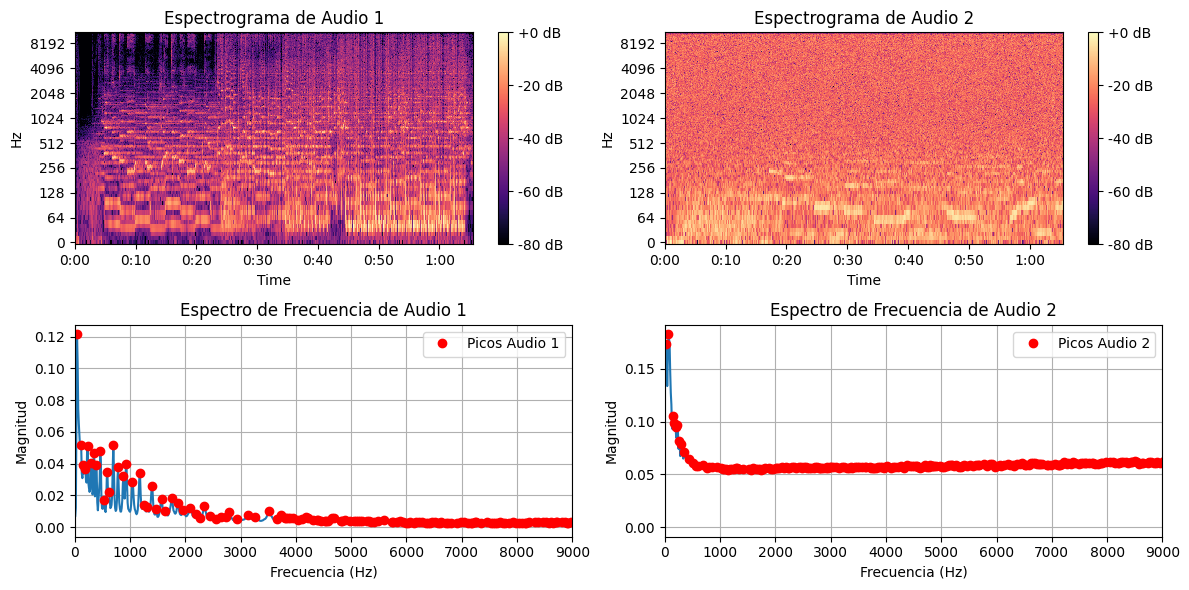

El porcentaje de similitud entre los archivos de audio es: -10789.72%


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from collections import Counter

# Función para calcular el porcentaje de similitud entre dos señales de audio
def calcular_similitud_audio(audio1, audio2):
    # Cargar las señales de audio en formato .mp3
    signal1, sr1 = librosa.load(audio1)
    signal2, sr2 = librosa.load(audio2)

    # Alinear las longitudes de ambas señales
    min_len = min(len(signal1), len(signal2))
    signal1 = signal1[:min_len]
    signal2 = signal2[:min_len]

    # Cambiar el tamaño de la ventana (n_fft) para mejorar la resolución en frecuencia
    fft_signal1 = np.abs(librosa.stft(signal1, n_fft=2048))  # Ejemplo de tamaño de ventana
    fft_signal2 = np.abs(librosa.stft(signal2, n_fft=2048))

    # Normalizar las matrices de amplitudes de las transformadas de Fourier
    fft_signal1 /= np.max(fft_signal1)
    fft_signal2 /= np.max(fft_signal2)

    # Calcular la distancia euclidiana entre las matrices normalizadas
    distancia = np.linalg.norm(fft_signal1 - fft_signal2)

    # Normalizar la distancia en un valor entre 0 y 100
    porcentaje_similitud = 100 - (distancia * 100)

    # Calcular el espectro de magnitud promedio
    magnitude1 = np.abs(fft_signal1).mean(axis=1)
    magnitude2 = np.abs(fft_signal2).mean(axis=1)

    # Encontrar los picos en el espectro de frecuencia
    peaks1, _ = find_peaks(magnitude1)
    peaks2, _ = find_peaks(magnitude2)

    # Limitar la cantidad de picos al tamaño de las frecuencias calculadas
    num_fft_bins = fft_signal1.shape[0]
    peaks1 = peaks1[:num_fft_bins]
    peaks2 = peaks2[:num_fft_bins]

    # Mapear las frecuencias de los picos a notas musicales
    if len(peaks1) > 0:
        notes1 = librosa.hz_to_note(librosa.fft_frequencies(sr=sr1)[peaks1])
    else:
        notes1 = []

    if len(peaks2) > 0:
        notes2 = librosa.hz_to_note(librosa.fft_frequencies(sr=sr2)[peaks2])
    else:
        notes2 = []

    # Contar la frecuencia de cada nota
    note_counts1 = Counter(notes1)
    note_counts2 = Counter(notes2)

    # Guardar las notas en un archivo .txt
    with open('notas_audio1.txt', 'w') as file:
        for note, count in note_counts1.items():
            file.write(f"{note}: {count}\n")

    with open('notas_audio2.txt', 'w') as file:
        for note, count in note_counts2.items():
            file.write(f"{note}: {count}\n")

    # Visualizar los resultados
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    librosa.display.specshow(librosa.amplitude_to_db(fft_signal1, ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio 1')

    plt.subplot(2, 2, 2)
    librosa.display.specshow(librosa.amplitude_to_db(fft_signal2, ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio 2')

    plt.subplot(2, 2, 3)
    plt.plot(librosa.fft_frequencies(sr=sr1), magnitude1)
    plt.plot(librosa.fft_frequencies(sr=sr1)[peaks1], magnitude1[peaks1], 'ro', label='Picos Audio 1')
    plt.title('Espectro de Frecuencia de Audio 1')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')  # Añadir título al eje y
    plt.xlim(0, 9000)  # Limitar el rango de visualización para frecuencias audibles
    plt.grid()
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(librosa.fft_frequencies(sr=sr2), magnitude2)
    plt.plot(librosa.fft_frequencies(sr=sr2)[peaks2], magnitude2[peaks2], 'ro', label='Picos Audio 2')
    plt.title('Espectro de Frecuencia de Audio 2')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')  # Añadir título al eje y
    plt.xlim(0, 9000)  # Limitar el rango de visualización para frecuencias audibles
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    return porcentaje_similitud

# Rutas a los archivos de audio .mp3 que deseas comparar
audio_file1 = "Alone.mp3"
audio_file2 = "audio_con_ruido.mp3"

# Calcular el porcentaje de similitud y obtener los espectros y espectrogramas
similitud = calcular_similitud_audio(audio_file1, audio_file2)

# Mostrar el porcentaje de similitud
print(f"El porcentaje de similitud entre los archivos de audio es: {similitud:.2f}%")


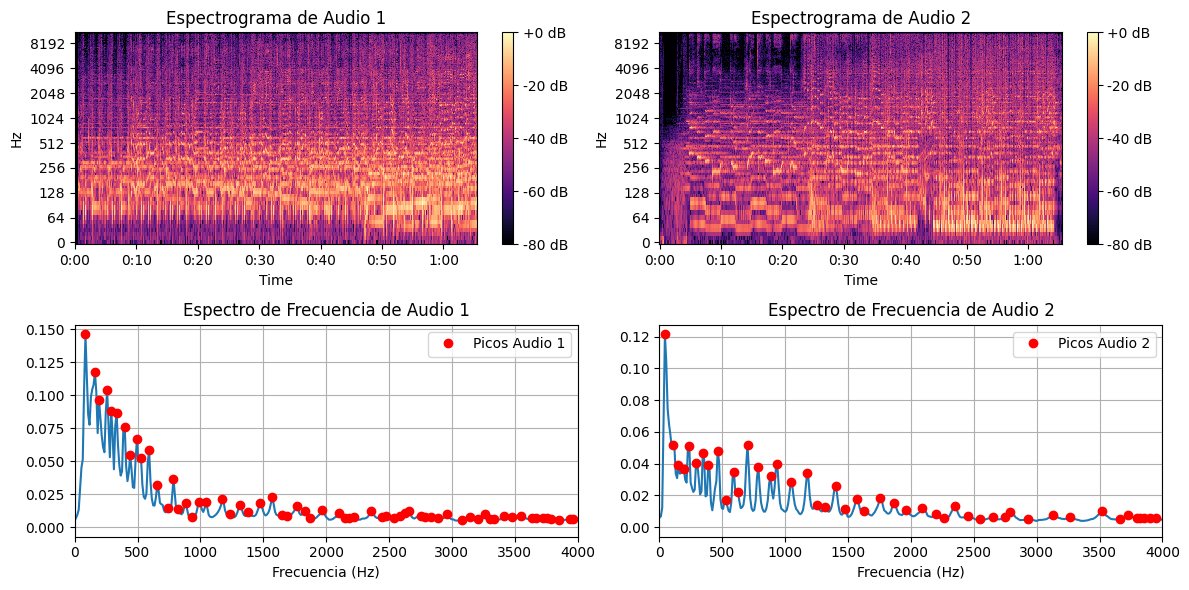

El porcentaje de similitud entre los archivos de audio es: -4428.37%


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from collections import Counter

# Función para calcular el porcentaje de similitud entre dos señales de audio
def calcular_similitud_audio(audio1, audio2):
    # Cargar las señales de audio en formato .mp3
    signal1, sr1 = librosa.load(audio1)
    signal2, sr2 = librosa.load(audio2)

    # Alinear las longitudes de ambas señales
    min_len = min(len(signal1), len(signal2))
    signal1 = signal1[:min_len]
    signal2 = signal2[:min_len]

    # Calcular las transformadas de Fourier de ambas señales
    fft_signal1 = np.abs(librosa.stft(signal1))
    fft_signal2 = np.abs(librosa.stft(signal2))

    # Normalizar las matrices de amplitudes de las transformadas de Fourier
    fft_signal1 /= np.max(fft_signal1)
    fft_signal2 /= np.max(fft_signal2)

    # Calcular la distancia euclidiana entre las matrices normalizadas
    distancia = np.linalg.norm(fft_signal1 - fft_signal2)

    # Normalizar la distancia en un valor entre 0 y 100
    porcentaje_similitud = 100 - (distancia * 100)

    # Calcular el espectro de magnitud promedio
    magnitude1 = np.abs(fft_signal1).mean(axis=1)
    magnitude2 = np.abs(fft_signal2).mean(axis=1)

    # Encontrar los picos en el espectro de frecuencia
    peaks1, _ = find_peaks(magnitude1)
    peaks2, _ = find_peaks(magnitude2)

    # Mapear las frecuencias de los picos a notas musicales
    if len(peaks1) > 0:
        notes1 = librosa.hz_to_note(librosa.fft_frequencies(sr=sr1)[peaks1])
    else:
        notes1 = []

    if len(peaks2) > 0:
        notes2 = librosa.hz_to_note(librosa.fft_frequencies(sr=sr2)[peaks2])
    else:
        notes2 = []

    # Contar la frecuencia de cada nota
    note_counts1 = Counter(notes1)
    note_counts2 = Counter(notes2)

    # Guardar las notas en un archivo .txt
    with open('notas_audio1.txt', 'w') as file:
        for note, count in note_counts1.items():
            file.write(f"{note}: {count}\n")

    with open('notas_audio2.txt', 'w') as file:
        for note, count in note_counts2.items():
            file.write(f"{note}: {count}\n")

    # Visualizar los resultados
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    librosa.display.specshow(librosa.amplitude_to_db(fft_signal1, ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio 1')

    plt.subplot(2, 2, 2)
    librosa.display.specshow(librosa.amplitude_to_db(fft_signal2, ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio 2')

    plt.subplot(2, 2, 3)
    plt.plot(librosa.fft_frequencies(sr=sr1), magnitude1)
    plt.plot(librosa.fft_frequencies(sr=sr1)[peaks1], magnitude1[peaks1], 'ro', label='Picos Audio 1')
    plt.title('Espectro de Frecuencia de Audio 1')
    plt.xlabel('Frecuencia (Hz)')
    plt.xlim(0, 4000)  # Limitar el rango de visualización para frecuencias audibles
    plt.grid()
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(librosa.fft_frequencies(sr=sr2), magnitude2)
    plt.plot(librosa.fft_frequencies(sr=sr2)[peaks2], magnitude2[peaks2], 'ro', label='Picos Audio 2')
    plt.title('Espectro de Frecuencia de Audio 2')
    plt.xlabel('Frecuencia (Hz)')
    plt.xlim(0, 4000)  # Limitar el rango de visualización para frecuencias audibles
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    return porcentaje_similitud

# Rutas a los archivos de audio .mp3 que deseas comparar
audio_file1 = "flores.mp3"
audio_file2 = "Alone.mp3"

# Calcular el porcentaje de similitud y obtener los espectros y espectrogramas
similitud = calcular_similitud_audio(audio_file1, audio_file2)

# Mostrar el porcentaje de similitud
print(f"El porcentaje de similitud entre los archivos de audio es: {similitud:.2f}%")




Filtro

In [ ]:
from pydub import AudioSegment

def filtrar_frecuencias_altas(input_file, output_file, cutoff_freq):
    # Cargar el archivo de audio en formato mp3
    audio = AudioSegment.from_mp3(input_file)

    # Aplicar un filtro de paso alto para eliminar frecuencias bajas
    audio = audio.high_pass_filter(cutoff_freq)  # Eliminar frecuencias por debajo de 'cutoff_freq'

    # Guardar el archivo filtrado en formato mp3
    audio.export(output_file, format="mp3")

# Ruta al archivo de entrada y salida
input_file = "Alone.mp3"
output_file = "salida_filtrada.mp3"

# Definir la frecuencia de corte para el filtro de paso alto (en Hz)
cutoff_freq = 500  # Frecuencia de corte para eliminar frecuencias bajas

# Filtrar el archivo de audio y guardar solo las frecuencias altas
filtrar_frecuencias_altas(input_file, output_file, cutoff_freq)



Ruido

In [ ]:
from pydub import AudioSegment
import numpy as np

def agregar_ruido(input_file, output_file, nivel_ruido_db):
    # Cargar el archivo de audio en formato mp3
    audio = AudioSegment.from_mp3(input_file)

    # Obtener los datos de audio como una matriz numpy
    audio_data = np.array(audio.get_array_of_samples())

    # Calcular la energía actual del audio
    energia_actual = np.mean(audio_data ** 2)

    # Calcular la energía del ruido deseada (convertida de dB)
    nivel_ruido_linear = 10 ** (nivel_ruido_db / 10)
    energia_ruido = nivel_ruido_linear * energia_actual

    # Generar una señal de ruido blanco con la misma longitud que el audio
    ruido = np.random.normal(scale=np.sqrt(energia_ruido), size=len(audio_data))

    # Sumar el ruido al audio original
    audio_data_con_ruido = audio_data + ruido

    # Crear un nuevo objeto AudioSegment con los datos de audio modificados
    audio_con_ruido = AudioSegment(audio_data_con_ruido.tobytes(), frame_rate=audio.frame_rate, sample_width=audio.sample_width, channels=audio.channels)

    # Exportar el archivo con ruido en formato mp3
    audio_con_ruido.export(output_file, format="mp3")

# Ruta al archivo de entrada y salida
input_file = "Alone.mp3"
output_file = "audio_con_ruido.mp3"

# Nivel de ruido deseado en dB (ajusta este valor según tus necesidades)
nivel_ruido_db = 10  # Puedes aumentar o disminuir el nivel de ruido

# Agregar ruido al archivo de audio y guardarlo
agregar_ruido(input_file, output_file, nivel_ruido_db)


Notas Musicales Detectadas en los Picos:
C2:1
A♯2:1
E3:1
G3:1
B3:1
E4:1
G4:1
A4:1
B4:1
C5:1
D5:1
E5:1
F5:1
F♯5:1
G5:1
A5:1
B5:1
C6:1
D6:1
D♯6:1
E6:1
F6:1
F♯6:1
G6:1
G♯6:2
A6:1
A♯6:1
B6:1
C7:2
C♯7:1
D7:1
D♯7:3
E7:2
F7:3
F♯7:2
G7:2
G♯7:4
A7:3
A♯7:5
B7:1
C8:3
C♯8:5
D8:5
D♯8:5
E8:5
F8:7
F♯8:4
G8:7
G♯8:6
A8:6
A♯8:7
B8:6
C9:9
C♯9:9
D9:7
D♯9:9
E9:5


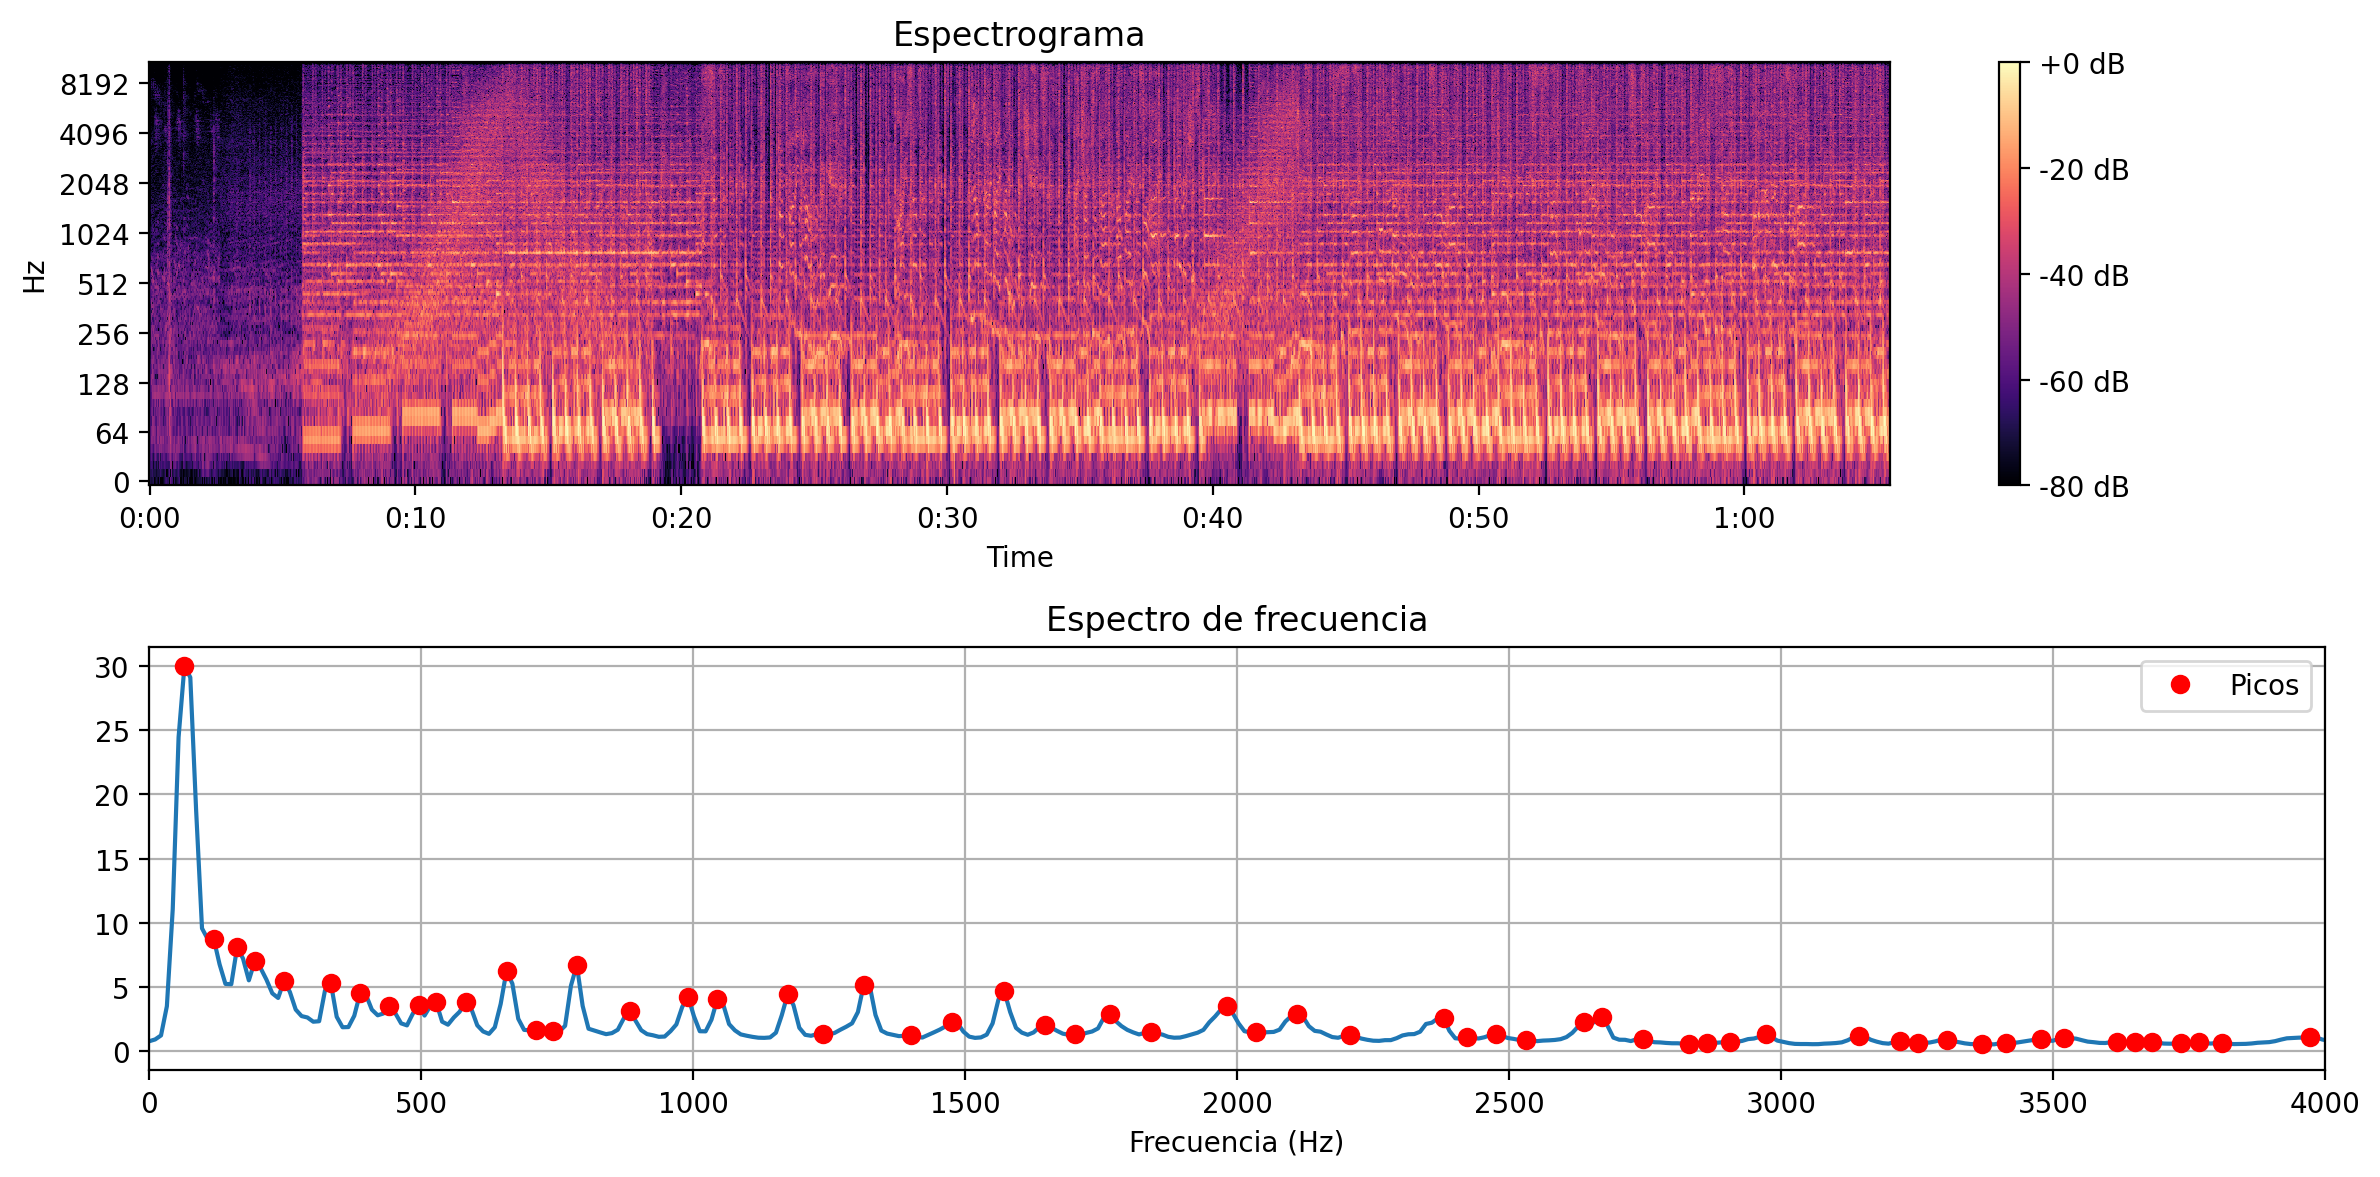

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import find_peaks
from collections import Counter

# Cargar la pista de audio
audio_file = "Rise Up.mp3"
y, sr = librosa.load(audio_file)

# Aplicar la transformada de Fourier de corto plazo (STFT)
D = librosa.stft(y)

# Calcular el espectro de magnitud
magnitude = np.abs(D)

# Obtener las frecuencias correspondientes
frequencies = librosa.core.fft_frequencies(sr=sr)

# Encontrar los picos en el espectro
peaks, _ = find_peaks(magnitude.mean(axis=1))

# Mapear las frecuencias de los picos a notas musicales

# Mapear las frecuencias de los picos a notas musicales
if len(peaks) > 0:
    notes = librosa.hz_to_note(frequencies[peaks])
else:
    print("No se encontraron picos en el espectro de frecuencia.")
    notes = []

# Contar la frecuencia de cada nota
note_counts = Counter(notes)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')

plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude.mean(axis=1))
plt.plot(frequencies[peaks], magnitude.mean(axis=1)[peaks], 'ro', label='Picos')
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0, 4000)  # Limitar el rango de visualización para frecuencias audibles
plt.grid()
plt.legend()

print("Notas Musicales Detectadas en los Picos:")
for note, count in note_counts.items():
    print(f"{note}:{count}")

plt.tight_layout()
plt.show()


Notas Musicales Detectadas en los Picos:
F1:1
D2:1
G2:1
D3:1
G3:1
B3:1
D4:1
E4:1
G4:1
A4:1
B4:1
D5:1
E5:1
F♯5:1
G5:1
A5:1
A♯5:1
B5:1
C6:2
C♯6:1
D6:1
D♯6:2
E6:1
F6:1
F♯6:1
G6:1
G♯6:2
A6:2
A♯6:1
B6:1
C7:3
C♯7:4
D7:2
D♯7:2
E7:3
F7:3
F♯7:2
G7:4
G♯7:5
A7:4
A♯7:6
B7:4
C8:7
C♯8:4
D8:8
D♯8:8
E8:5
F8:9
F♯8:9
G8:9
G♯8:8
A8:9
A♯8:10
B8:11
C9:10
C♯9:9
D9:12
D♯9:12
E9:5


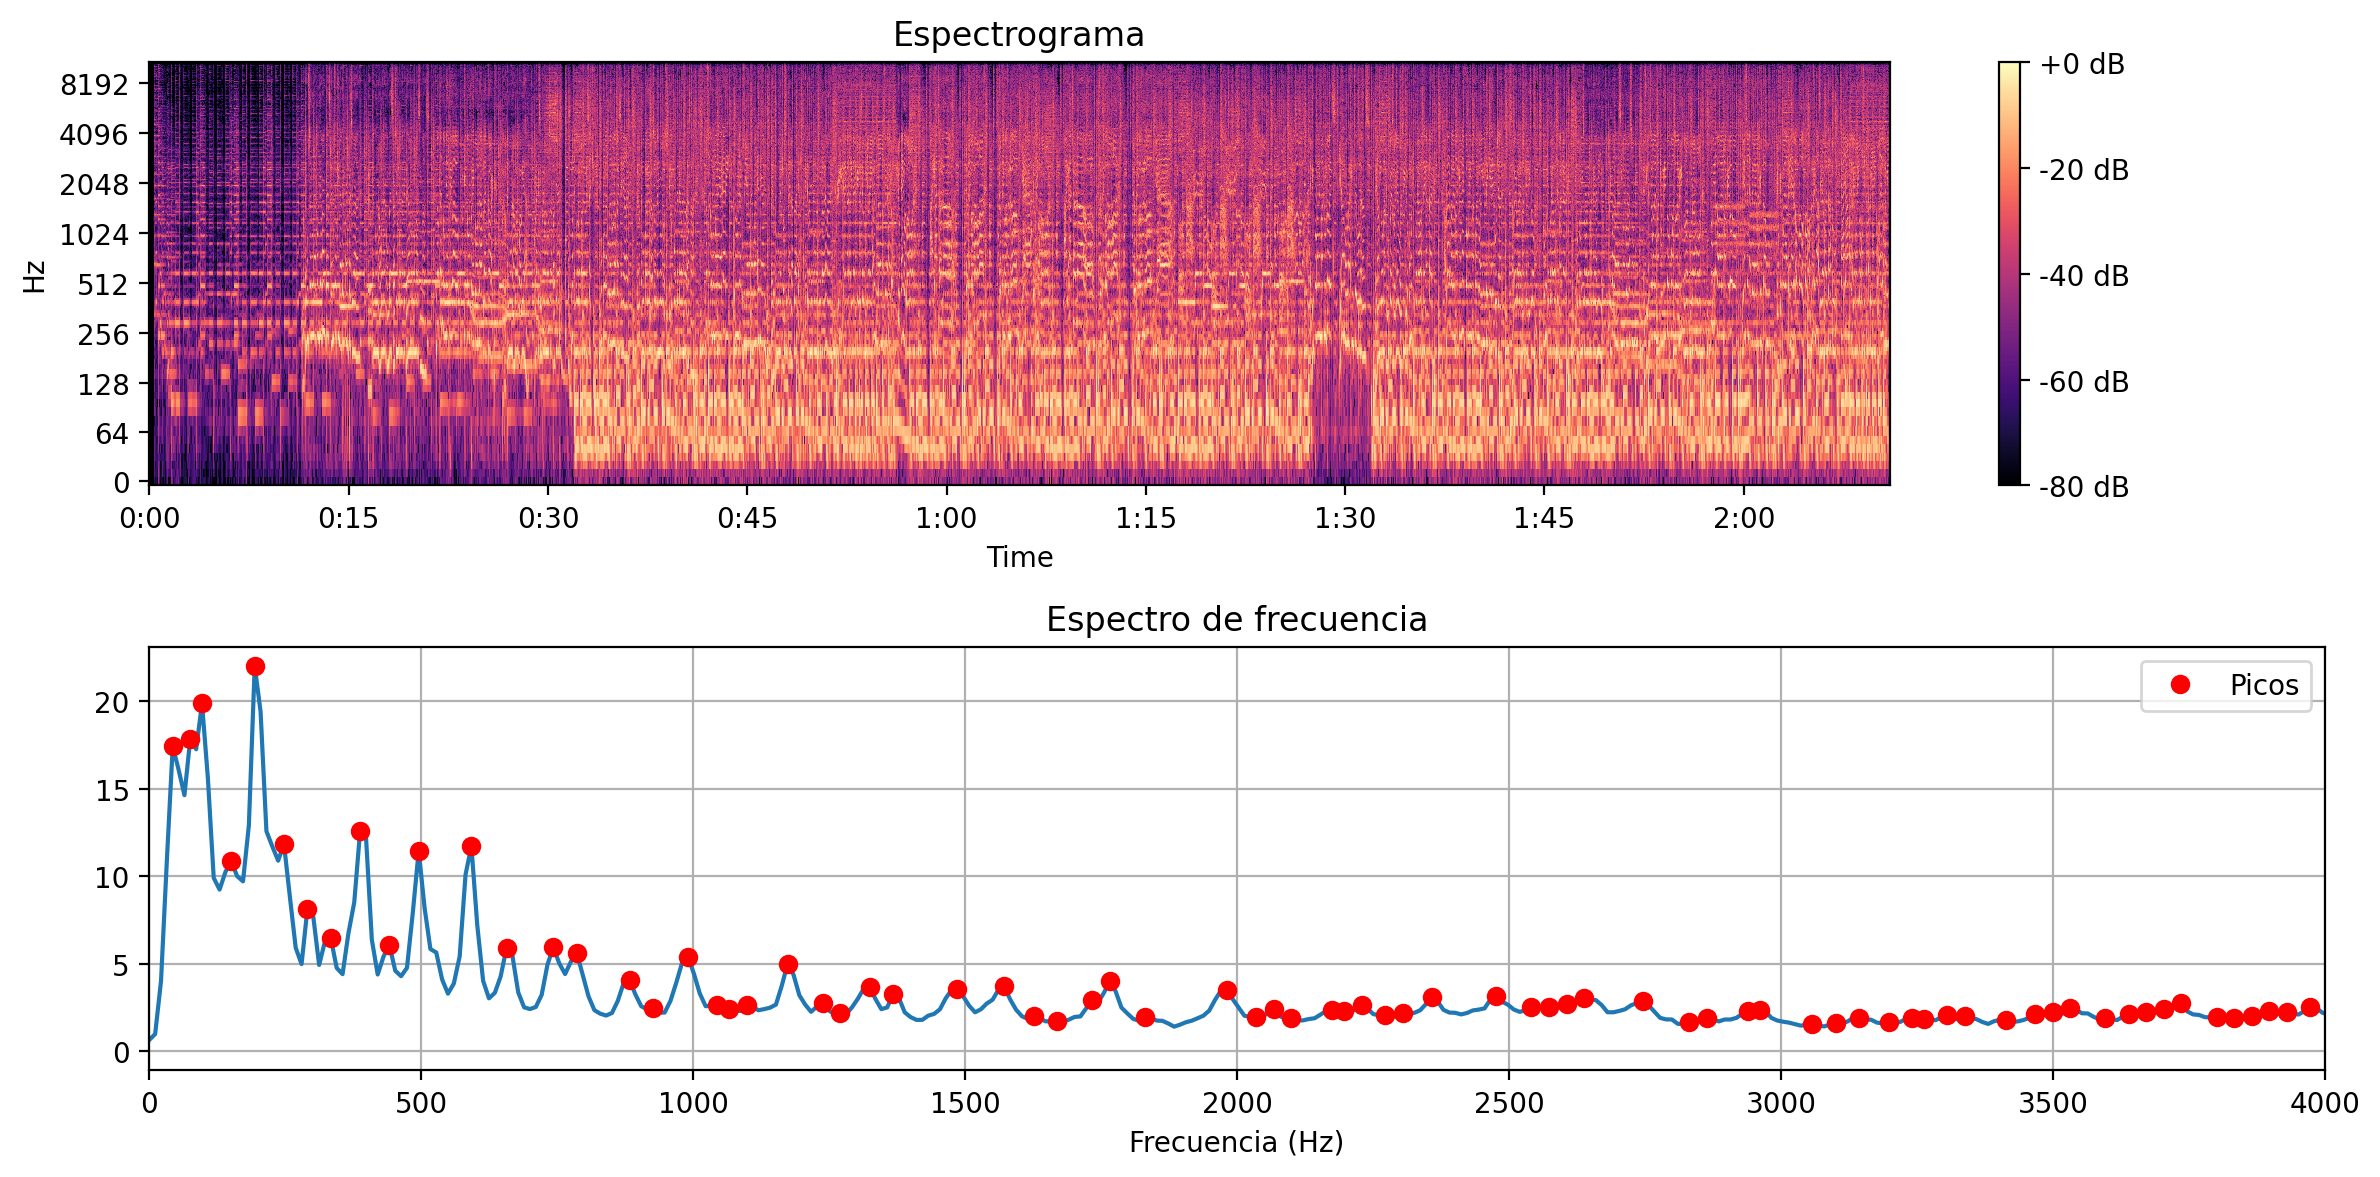

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import find_peaks
from collections import Counter

# Cargar la pista de audio
audio_file = "audio_1_1.mp3"
y, sr = librosa.load(audio_file)

# Aplicar la transformada de Fourier de corto plazo (STFT)
D = librosa.stft(y)

# Calcular el espectro de magnitud
magnitude = np.abs(D)

# Obtener las frecuencias correspondientes
frequencies = librosa.core.fft_frequencies(sr=sr)

# Encontrar los picos en el espectro
peaks, _ = find_peaks(magnitude.mean(axis=1))

# Mapear las frecuencias de los picos a notas musicales

# Mapear las frecuencias de los picos a notas musicales
if len(peaks) > 0:
    notes = librosa.hz_to_note(frequencies[peaks])
else:
    print("No se encontraron picos en el espectro de frecuencia.")
    notes = []

# Contar la frecuencia de cada nota
note_counts = Counter(notes)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')

plt.subplot(2, 1, 2)
plt.plot(frequencies, magnitude.mean(axis=1))
plt.plot(frequencies[peaks], magnitude.mean(axis=1)[peaks], 'ro', label='Picos')
plt.title('Espectro de frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0, 4000)  # Limitar el rango de visualización para frecuencias audibles
plt.grid()
plt.legend()

print("Notas Musicales Detectadas en los Picos:")
for note, count in note_counts.items():
    print(f"{note}:{count}")

plt.tight_layout()
plt.show()

Audio 1

In [ ]:
import wave

# Abre el archivo WAV en modo lectura
nombre_archivo = "audio1.wav"
with wave.open(nombre_archivo, 'rb') as archivo_wav:
    # Obtiene el número de canales del archivo WAV
    num_canales = archivo_wav.getnchannels()

# Imprime el número de canales
print(f"El archivo '{nombre_archivo}' tiene {num_canales} canal(es).")


El archivo 'audio1.wav' tiene 2 canal(es).


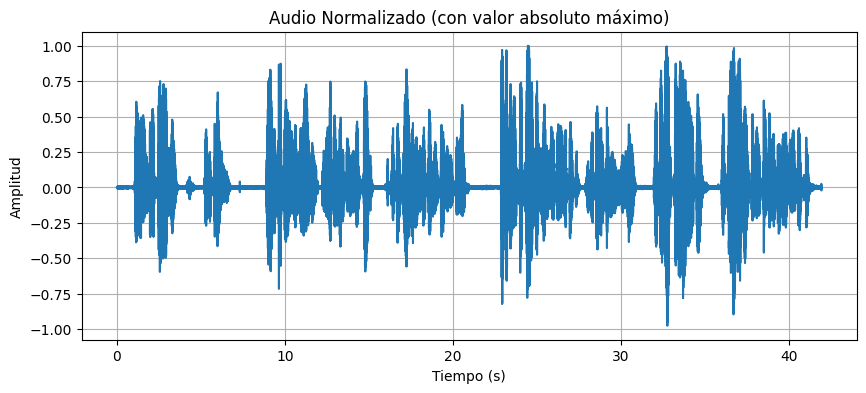

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Abre el archivo WAV en modo lectura
nombre_archivo = "audio1.wav"
with wave.open(nombre_archivo, 'rb') as archivo_wav:
    # Obtiene los parámetros del archivo WAV
    num_canales = archivo_wav.getnchannels()
    num_frames = archivo_wav.getnframes()
    sample_width = archivo_wav.getsampwidth()
    framerate = archivo_wav.getframerate()

    # Lee los datos de audio
    audio_data = np.frombuffer(archivo_wav.readframes(num_frames), dtype=np.int16)

# Encuentra el valor absoluto máximo en los datos de audio
max_abs_value = np.max(np.abs(audio_data))

# Normaliza el audio dividiendo por el valor absoluto máximo
audio_data_normalized = audio_data / max_abs_value

# Grafica el audio normalizado
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(audio_data_normalized) / framerate, len(audio_data_normalized)), audio_data_normalized)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Audio Normalizado (con valor absoluto máximo)')
plt.grid(True)
plt.show()


AUDIO 2

In [ ]:
import wave

# Abre el archivo WAV en modo lectura
nombre_archivo = "audio2.wav"
with wave.open(nombre_archivo, 'rb') as archivo_wav:
    # Obtiene el número de canales del archivo WAV
    num_canales = archivo_wav.getnchannels()

# Imprime el número de canales
print(f"El archivo '{nombre_archivo}' tiene {num_canales} canal(es).")

El archivo 'audio2.wav' tiene 2 canal(es).


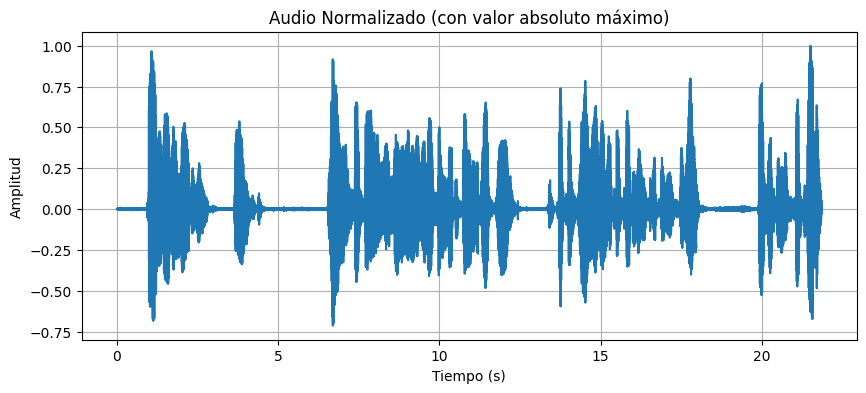

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Abre el archivo WAV en modo lectura
nombre_archivo = "audio2.wav"
with wave.open(nombre_archivo, 'rb') as archivo_wav:
    # Obtiene los parámetros del archivo WAV
    num_canales = archivo_wav.getnchannels()
    num_frames = archivo_wav.getnframes()
    sample_width = archivo_wav.getsampwidth()
    framerate = archivo_wav.getframerate()

    # Lee los datos de audio
    audio_data = np.frombuffer(archivo_wav.readframes(num_frames), dtype=np.int16)

# Encuentra el valor absoluto máximo en los datos de audio
max_abs_value = np.max(np.abs(audio_data))

# Normaliza el audio dividiendo por el valor absoluto máximo
audio_data_normalized = audio_data / max_abs_value

# Grafica el audio normalizado
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(audio_data_normalized) / framerate, len(audio_data_normalized)), audio_data_normalized)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Audio Normalizado (con valor absoluto máximo)')
plt.grid(True)
plt.show()

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el espectro de frecuencia
def calcular_espectro(datos_audio, framerate):
    n = len(datos_audio)
    frecuencias = np.fft.fftfreq(n, 1.0 / framerate)
    espectro = np.abs(np.fft.fft(datos_audio))
    return frecuencias, espectro

# Abre el primer archivo WAV
nombre_archivo1 = "audio1.wav"
with wave.open(nombre_archivo1, 'rb') as archivo_wav1:
    framerate1 = archivo_wav1.getframerate()
    audio_data1 = np.frombuffer(archivo_wav1.readframes(archivo_wav1.getnframes()), dtype=np.int16)

# Abre el segundo archivo WAV
nombre_archivo2 = "audio2.wav"
with wave.open(nombre_archivo2, 'rb') as archivo_wav2:
    framerate2 = archivo_wav2.getframerate()
    audio_data2 = np.frombuffer(archivo_wav2.readframes(archivo_wav2.getnframes()), dtype=np.int16)

# Calcula el espectro de frecuencia para ambas señales de audio
frecuencias1, espectro1 = calcular_espectro(audio_data1, framerate1)
frecuencias2, espectro2 = calcular_espectro(audio_data2, framerate2)

# Grafica los espectros en subtramas
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 3)
plt.plot(librosa.fft_frequencies(sr=sr1), magnitude1)
plt.plot(librosa.fft_frequencies(sr=sr1)[peaks1], magnitude1[peaks1], 'ro', label='Picos Audio 1')
plt.title('Espectro de Frecuencia de Audio 1')
plt.xlabel('Frecuencia (Hz)')  # Título del eje X
plt.ylabel('Magnitud')  # Título del eje Y
plt.xlim(0, 4000)  # Limitar el rango de visualización para frecuencias audibles
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(librosa.fft_frequencies(sr=sr2), magnitude2)
plt.plot(librosa.fft_frequencies(sr=sr2)[peaks2], magnitude2[peaks2], 'ro', label='Picos Audio 2')
plt.title('Espectro de Frecuencia de Audio 2')
plt.xlabel('Frecuencia (Hz)')  # Título del eje X
plt.ylabel('Magnitud')  # Título del eje Y
plt.xlim(0, 4000)  # Limitar el rango de visualización para frecuencias audibles
plt.grid()
plt.legend()


plt.tight_layout()
plt.show()


FileNotFoundError: ignored

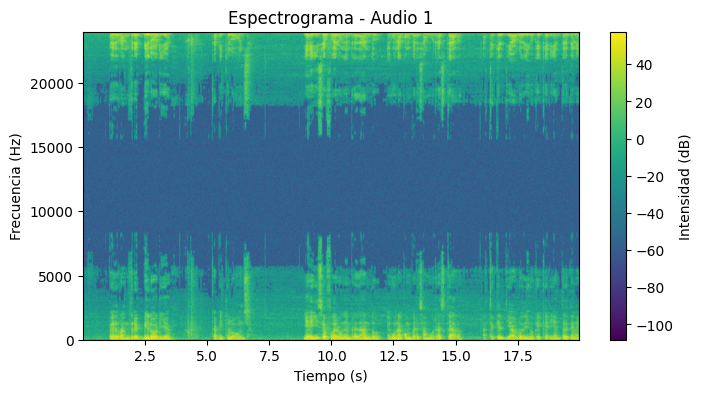

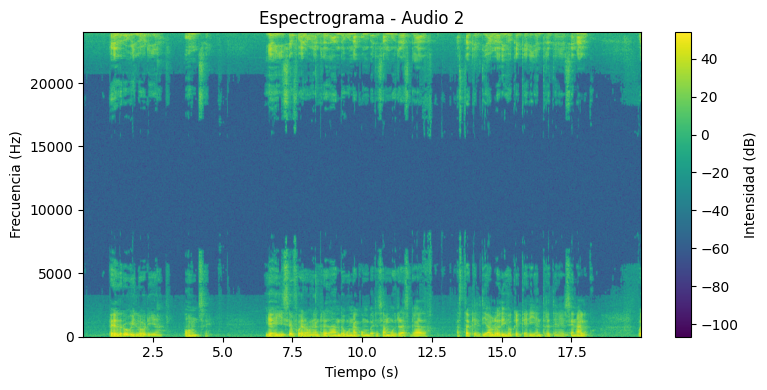

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular y mostrar el espectrograma con control de tamaño de ventana y duración
def calcular_y_mostrar_espectrograma(datos_audio, framerate, titulo, nfft=1086, duracion=20):
    muestras_deseadas = int(duracion * framerate)
    datos_audio_recortados = datos_audio[:muestras_deseadas]
    plt.figure(figsize=(8, 4))
    plt.specgram(datos_audio_recortados, Fs=framerate, cmap='viridis', NFFT=nfft)
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.colorbar(label='Intensidad (dB)')

# Abre el primer archivo WAV
nombre_archivo1 = "audio1.wav"
with wave.open(nombre_archivo1, 'rb') as archivo_wav1:
    framerate1 = archivo_wav1.getframerate()
    audio_data1 = np.frombuffer(archivo_wav1.readframes(archivo_wav1.getnframes()), dtype=np.int16)

# Abre el segundo archivo WAV
nombre_archivo2 = "audio2.wav"
with wave.open(nombre_archivo2, 'rb') as archivo_wav2:
    framerate2 = archivo_wav2.getframerate()
    audio_data2 = np.frombuffer(archivo_wav2.readframes(archivo_wav2.getnframes()), dtype=np.int16)

# Calcular y mostrar el espectrograma para ambos audios con un tamaño de ventana personalizado y 20 segundos de duración
calcular_y_mostrar_espectrograma(audio_data1, framerate1, "Espectrograma - Audio 1", nfft=1086, duracion=20)
calcular_y_mostrar_espectrograma(audio_data2, framerate2, "Espectrograma - Audio 2", nfft=1086, duracion=20)

plt.tight_layout()
plt.show()





**Audio 1 (Antes de Calentar la Voz):**
- **Forma de las Bandas de Frecuencia:** Las bandas de frecuencia en el espectrograma son irregulares y presentan fluctuaciones notables en la energía a lo largo del tiempo. Esto sugiere que la voz no está enfocada en un rango específico de frecuencias, lo que puede dar lugar a una entonación inestable.
- **Picos de Energía Dispersos:** Se observan picos de energía dispersos en varias partes del espectrograma, lo que indica que la voz no mantiene un tono constante. Esto puede deberse a una falta de calentamiento y preparación vocal previa.
- **Baja Potencia Vocal:** En términos generales, los valores de energía son más bajos, lo que sugiere una voz menos potente. La voz carece de la energía necesaria para un rendimiento vocal óptimo.

**Audio 2 (Después de Calentar la Voz):**
- **Forma de las Bandas de Frecuencia Mejor Definida:** Las bandas de frecuencia en el espectrograma son más definidas y estables en comparación con el Audio 1. Esto indica que la voz se encuentra enfocada en un rango específico de frecuencias, lo que conduce a una entonación más estable.
- **Picos de Energía Consistentes:** Se observan picos de energía más consistentes y concentrados, lo que sugiere una voz más estable en términos de tono y energía. Esto es un signo de una buena preparación vocal y control vocal mejorado.
- **Mayor Potencia Vocal:** Los valores de energía son más altos en general, lo que indica una voz más potente. La voz tiene una mayor presencia y proyección, loo que es esencial para una interpretación vocal efectiva.

En resumen, el Audio 2 muestra una mejora significativa en la calidad vocal en comparación con el Audio 1. Después de calentar la voz, la voz es más estable, enfocada y potente, lo que es esencial para una interpretación vocal exitosa y de alta calidad. El calentamiento vocal es una práctica importante para lograr un mejor rendimiento vocal.

In [ ]:
import wave
import numpy as np

# Función para calcular el espectrograma y obtener los datos
def calcular_espectrograma(datos_audio, framerate, nfft=1086, duracion=20):
    muestras_deseadas = int(duracion * framerate)
    datos_audio_recortados = datos_audio[:muestras_deseadas]
    espectros = [np.abs(np.fft.fft(datos_audio_recortados[i:i+nfft]))**2 for i in range(0, len(datos_audio_recortados)-nfft, nfft)]
    espectro = np.array(espectros).T
    frecuencias = np.fft.fftfreq(nfft, 1.0 / framerate)
    tiempos = np.arange(0, len(espectros)) * nfft / framerate
    espectro = 10 * np.log10(espectro)
    return frecuencias, tiempos, espectro

# Abre el primer archivo WAV
nombre_archivo1 = "audio1.wav"
with wave.open(nombre_archivo1, 'rb') as archivo_wav1:
    framerate1 = archivo_wav1.getframerate()
    audio_data1 = np.frombuffer(archivo_wav1.readframes(archivo_wav1.getnframes()), dtype=np.int16)

# Abre el segundo archivo WAV
nombre_archivo2 = "audio2.wav"
with wave.open(nombre_archivo2, 'rb') as archivo_wav2:
    framerate2 = archivo_wav2.getframerate()
    audio_data2 = np.frombuffer(archivo_wav2.readframes(archivo_wav2.getnframes()), dtype=np.int16)

# Calcular los espectrogramas y obtener los datos
frecuencias1, tiempos1, espectro1 = calcular_espectrograma(audio_data1, framerate1, nfft=1086, duracion=20)
frecuencias2, tiempos2, espectro2 = calcular_espectrograma(audio_data2, framerate2, nfft=1086, duracion=20)

# Imprimir los datos
print("Espectrograma - Audio 1")
print("Frecuencias:", frecuencias1)
print("Tiempos:", tiempos1)
print("Espectro (dB):")
print(espectro1)

print("Espectrograma - Audio 2")
print("Frecuencias:", frecuencias2)
print("Tiempos:", tiempos2)
print("Espectro (dB):")
print(espectro2)


Espectrograma - Audio 1
Frecuencias: [   0.           44.19889503   88.39779006 ... -132.59668508  -88.39779006
  -44.19889503]
Tiempos: [ 0.        0.022625  0.04525   0.067875  0.0905    0.113125  0.13575
  0.158375  0.181     0.203625  0.22625   0.248875  0.2715    0.294125
  0.31675   0.339375  0.362     0.384625  0.40725   0.429875  0.4525
  0.475125  0.49775   0.520375  0.543     0.565625  0.58825   0.610875
  0.6335    0.656125  0.67875   0.701375  0.724     0.746625  0.76925
  0.791875  0.8145    0.837125  0.85975   0.882375  0.905     0.927625
  0.95025   0.972875  0.9955    1.018125  1.04075   1.063375  1.086
  1.108625  1.13125   1.153875  1.1765    1.199125  1.22175   1.244375
  1.267     1.289625  1.31225   1.334875  1.3575    1.380125  1.40275
  1.425375  1.448     1.470625  1.49325   1.515875  1.5385    1.561125
  1.58375   1.606375  1.629     1.651625  1.67425   1.696875  1.7195
  1.742125  1.76475   1.787375  1.81      1.832625  1.85525   1.877875
  1.9005    1.923125 

Componentes espectrales

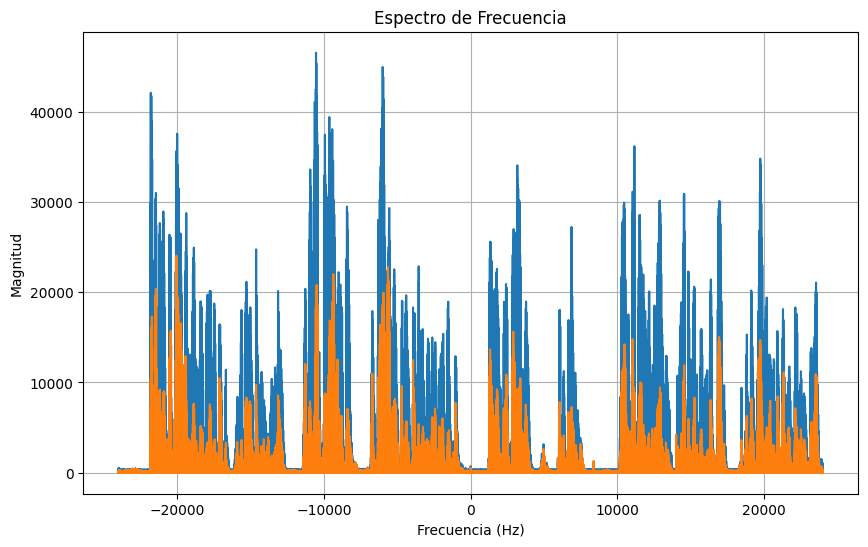

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Cargar el archivo de audio
sample_rate, audio_data = wavfile.read("audio1.wav")

# Calcular la Transformada de Fourier en Tiempo Discreto (DFT)
dft = np.fft.fft(audio_data)
frequencies = np.fft.fftfreq(len(dft), 1.0 / sample_rate)

# Calcular el espectro de magnitud (módulo de la DFT)
magnitude = np.abs(dft)

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitude)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia')
plt.grid()
plt.show()


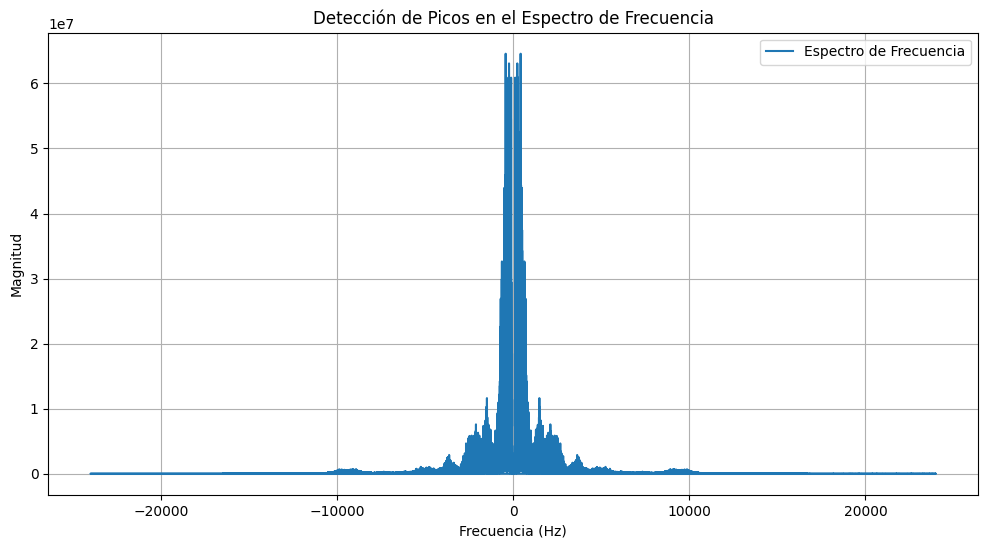

Notas presentes en el espectro:
A4
C5
C4
G4
F4
B4
E4
D4


In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Cargar el archivo de audio
sample_rate, audio_data = wavfile.read("audio1.wav")


# Asegurarse de que sea una señal mono (un solo canal)
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]  # Tomar solo el primer canal si hay múltiples canales

# Calcular la DFT de la señal
dft = np.fft.fft(audio_data)

# Calcular las frecuencias correspondientes a la DFT
frequencies = np.fft.fftfreq(len(dft), 1.0 / sample_rate)

# Calcular el módulo del espectro (la magnitud)
spectrum_magnitude = np.abs(dft)

# Encontrar picos en el espectro (frecuencias dominantes)
peaks, _ = find_peaks(spectrum_magnitude, height=5000)  # Ajusta el valor de "height" según tu señal y preferencias

# Obtener las frecuencias correspondientes a los picos
peak_frequencies = frequencies[peaks]

# Notas musicales correspondientes a las frecuencias (en Hz)
note_frequencies = {
    "C4": 261.63,
    "D4": 293.66,
    "E4": 329.63,
    "F4": 349.23,
    "G4": 392.00,
    "A4": 440.00,
    "B4": 493.88,
    "C5": 523.25,
}

# Detectar notas correspondientes a las frecuencias únicas de los picos
detected_notes = set()
for freq in peak_frequencies:
    closest_note = min(note_frequencies, key=lambda note: abs(note_frequencies[note] - freq))
    detected_notes.add(closest_note)

# Graficar el espectro y resaltar los picos
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum_magnitude, label='Espectro de Frecuencia')
#plt.plot(frequencies[peaks], spectrum_magnitude[peaks], 'ro', label='Picos')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Detección de Picos en el Espectro de Frecuencia')
plt.legend()
plt.grid()
plt.show()

# Imprimir las notas presentes
print("Notas presentes en el espectro:")
for note in detected_notes:
    print(note)

